# 05.02 Correlation and Statistics

A statistic is a measure takes over data, and well, that is it.
A statistic does *not* have a meaning,
it it the interpreter of the statistic that give is the meaning.
That sounds simple but it is too often forgotten.
Hence I repeat it: a statistic has no meaning,
the meaning is given by the interpreter of the statistic.

The interpreter of the statistic is expected to have a reasonable
understanding of the data.
And he builds an understanding of the data by obtaining statistics
on the data and analyzing every statistic taking into accordance
all other statistics obtained.
In summary, taking a piece of data, running one statistic
and then saying something about that data based on that
statistic alone is plain wrong.

We will look at a handful of fallacies when using the statistics we saw before.
Notably how correlation shall not be trusted.
For a start we import what we need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

![Mathematicians](da-gauss-euler.svg)

<div style="text-align:right;"><sup>da-gauss-euler.svg</sup></div>

<div style="border: 0.3em double teal; border-radius: 0.5em; padding: 0.5em;">
    Gauss (left) and Euler (right) are considered to be the fathers of modern mathematics.
    Often they are portrayed as rivals, an idea that is vastly incorrect.
    Leonhard Euler was born in 1707 and died in 1783,
    whilst Johann Carl Friedrich Gauss was born in 1777 and died in 1855.
    Hence Euler passed away whilst Gauss was still 6 years old.
    Despite the fact that Gauss was a child prodigy,
    it is hard to believe that he would meet,
    or even know of Euler at such a young age.
</div>

## Anscombe Quartet

A tiny dataset of $4$ set of $11$ two dimensional points will be our guide.
This small dataset is called the Anscombe quartet,
it was developed by John Anscombe in 1937 to show that plain statistics
do not represent well a set of data.

In the early $20th$ century many believed that human understanding is faulty,
and instead we can develop measures on data that can perform better
than a biased human.
As noble as the idea sounds it is quite impossible to achieve.
Every attempt at infallible statistics only resulted in the development
of counterexamples to that statistic.
Unfortunately, the concept that humans are biased whilst statistics
are undoubtedly correct is still propagated by many;
despite the fact that the concept failed to bear fruit for a century now.

In [2]:
# fmt: off
ans = pd.DataFrame(dict(
x1=[10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00,  4.00, 12.00, 7.00, 5.00],
y1=[ 8.04, 6.95,  7.58, 8.81,  8.33,  9.96, 7.24,  4.26, 10.84, 4.82, 5.68],
x2=[10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00,  4.00, 12.00, 7.00, 5.00],
y2=[ 9.14, 8.14,  8.74, 8.77,  9.26,  8.10, 6.13,  3.10,  9.13, 7.26, 4.74],
x3=[10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00,  4.00, 12.00, 7.00, 5.00],
y3=[ 7.46, 6.77, 12.74, 7.11,  7.81,  8.84, 6.08,  5.39,  8.15, 6.42, 5.73],
x4=[ 8.00, 8.00,  8.00, 8.00,  8.00,  8.00, 8.00, 19.00,  8.00, 8.00, 8.00],
y4=[ 6.58, 5.76,  7.71, 8.84,  8.47,  7.04, 5.25, 12.50,  5.56, 7.91, 6.89],
))
# fmt: on
ans

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


As said, we have $4$ set of data and nothing out of the ordinary can be seen about these sets.
We will perform some statistics on these sets and check what comes out.

In [3]:
ans.x1.mean(), ans.x2.mean(), ans.x3.mean(), ans.x4.mean()

(np.float64(9.0), np.float64(9.0), np.float64(9.0), np.float64(9.0))

The mean of all four sets seems to be the same.
The numbers are quite different from each other but their sum is the same.
A fair point, there are many (infinite) ways to select $11$
number which all sum to $99$.

Let's check the values for $y$ now.

In [4]:
ans.y1.mean(), ans.y2.mean(), ans.y3.mean(), ans.y4.mean()

(np.float64(7.500909090909093),
 np.float64(7.50090909090909),
 np.float64(7.5),
 np.float64(7.500909090909091))

And these means are again pretty much the same.
The same reasoning is valid here too.
There are many way to select $11$ numbers so that their sum is around $82.5$.

Now we should check the variance or standard deviation.
One is just the square of the other so we can just check one of them.

In [5]:
ans.x1.std(), ans.x2.std(), ans.x3.std(), ans.x4.std()

(np.float64(3.3166247903554),
 np.float64(3.3166247903554),
 np.float64(3.3166247903554),
 np.float64(3.3166247903554))

Now this is intriguing,
the standard deviations are nearly the same for all values in $x$.
The *spread* over the horizontal axis is the same for each set.

Will the same be for the vertical axis?
We shall check.

In [6]:
ans.y1.std(), ans.y2.std(), ans.y3.std(), ans.y4.std()

(np.float64(2.031568135925815),
 np.float64(2.0316567355016177),
 np.float64(2.030423601123667),
 np.float64(2.0305785113876023))

And the standard deviation on the vertical axis is $2.03$ in all sets.
By now we are expecting all things to be the same in the strange group
of for sets of $11$ data points.

Until now we have been checking statistics for every of the $8$ columns by itself
But the quartet are $4$ sets, next we shall verify covariance between
the corresponding values for $x$ and $y$.
By now we know covariance can be scaled to give us correlation,
so we will use correlation directly.

In [7]:
def corr(x: np.ndarray, y: np.ndarray) -> float:
    return np.corrcoef(x, y)[0, 1]


(
    corr(ans.x1, ans.y1),
    corr(ans.x2, ans.y2),
    corr(ans.x3, ans.y3),
    corr(ans.x4, ans.y4),
)

(np.float64(0.81642051634484),
 np.float64(0.8162365060002427),
 np.float64(0.8162867394895982),
 np.float64(0.816521436888503))

And even the correlation between the four sets is the same.
We created an extra helper function to take the relevant part of the
return value from `corrcoef`.

After all these statistics one may be inclined to believe that the
for sets of $11$ points must look very similar to each other.
Let's plot each set and see for ourselves.

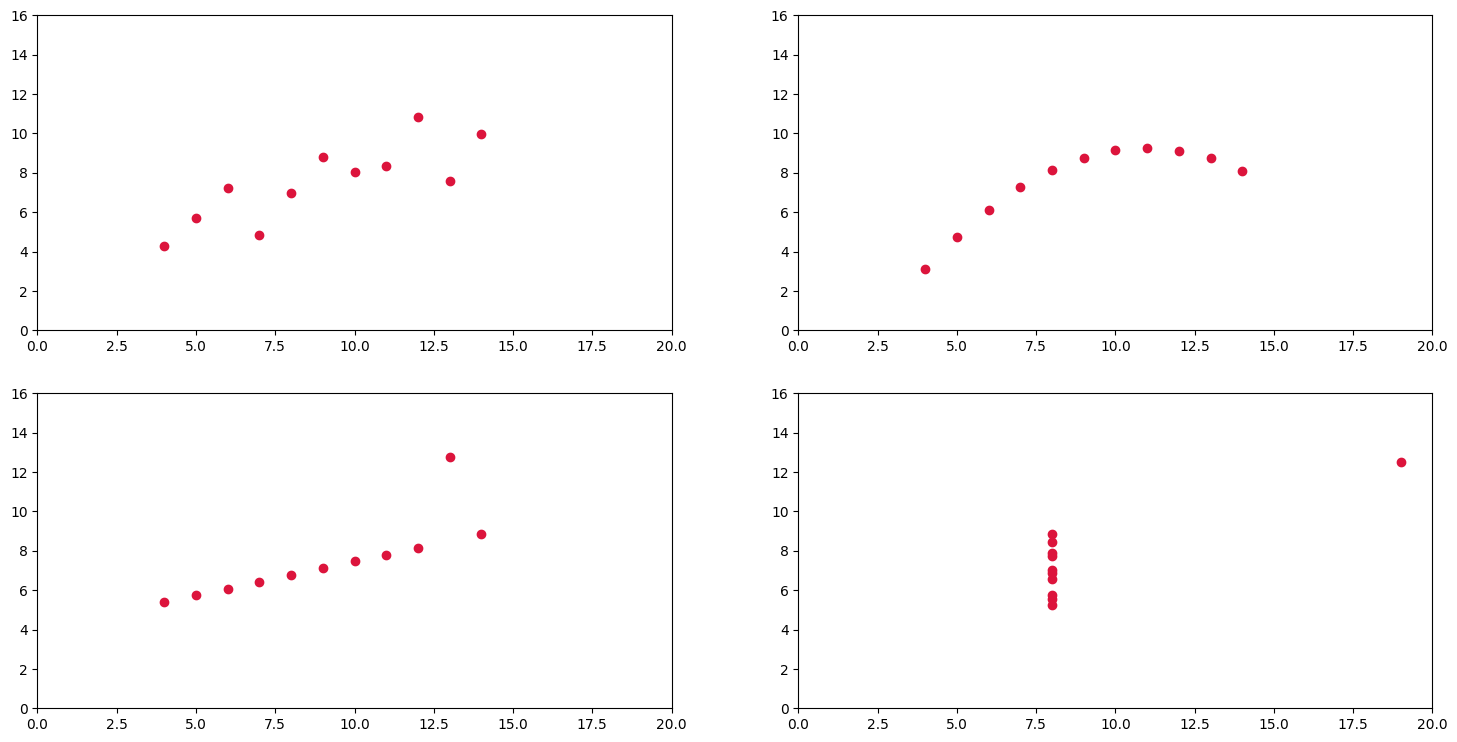

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(18, 9))
ax.flat[0].plot(ans.x1, ans.y1, "o", color="crimson")
ax.flat[1].plot(ans.x2, ans.y2, "o", color="crimson")
ax.flat[2].plot(ans.x3, ans.y3, "o", color="crimson")
ax.flat[3].plot(ans.x4, ans.y4, "o", color="crimson")
for axis in ax.flat:
    axis.set(xlim=(0, 20), ylim=(0, 16))

And the sets look *very different* from one another!
The idea that simple measures can give us certainty over data is flawed.
The Anscombe quartet is a simple example where huge differences can be
seen on tiny and low dimensional sets.
When the number of dimensions increases the chances of falling into
statistical fallacies, such as the meaning of almost equal standard deviation,
increases geometrically.
And unless there is a well known solution to a problem to compare against,
a handful of statistics does not have a meaning.

Most problems do not have well known solutions.
Do not be fooled that the meaning of a statistic in one problem
(one dataset) will bear the same meaning in another problem.
Also note how the last graph is a multivariate distribution
of data values, with two peaks.

## Never Trust Correlation Alone!

Let's take a completely different look at correlation,
we will look at vectors.
A vector is a combination of several scalar numbers in order
do describe a position in several dimensions at once.
We have been using NumPy arrays as vectors for a while now.
For example:

$$
\vec{v_1} = [3, 2, 7, 12]
$$

Is a vector representing a point in $4$ dimensional space.
We will argue that we can represent a generic vector in $4$
dimensions as:

$$
\vec{v_1} = [a_1, b_1, c_1, d_1]
$$

Extending this to more or less dimensions should be easy.
The length of the vector, or *euclidean norm*, is then defined as:

$$
\Vert v_1 \Vert = \sqrt{a_1^2 + b_1^2 + c_1^2 + d_1^2}
$$

![Vector Projection](da-cosinus.svg)

<div style="text-align:right;"><sup>da-cosinus.svg</sup></div>

And one of the operations defined on vectors is their scalar product:

$$
\vec{v_1} \cdot \vec{v_2}
= a_1 a_2 + b_1 b_2 + c_1 c_2 + d_1 d_2
$$

$$
\vec{v_1} \cdot \vec{v_2}
= \Vert v_1 \Vert \Vert v_2 \Vert \cos \theta
$$

Where $\theta$ is the angle between the two vectors.
Note that in $4$ dimensions $2$ vectors form a plane,
and on this plane the angle $\theta$ can be measured.
If we transform this last equation a little we can get
$\cos \theta$ on one side:

$$
\cos \theta = \frac{\vec{v_1} \cdot \vec{v_2}}{\Vert v_1 \Vert \Vert v_2 \Vert}
$$

And now I'll argue that $\cos \theta$ is just the value of *correlation*.
What?  Let's just do the code and see what it means later.

In [9]:
def norm(x: np.ndarray) -> float:
    return np.sqrt((x**2).sum())


x = ans.x1.to_numpy()
y = ans.y1.to_numpy()
xv = x - x.mean()
yv = y - y.mean()
cos = (xv * yv).sum() / (norm(xv) * norm(yv))
cos

np.float64(0.81642051634484)

We use the same data from the Anscombe quartet, just the first set of points.
We define `norm` to be the length of the vector ($\Vert \vec{v_1} \Vert$),
And we move the vectors so that their *mean is zero*,
this is important to make sure that we are dealing in similar ball park
to statistical moments.
And we output the $\cos \theta$ as per the equation above.
The value we get is the same as the correlation coefficient.

In [10]:
np.corrcoef(ans.x1.values, ans.y1.values)[0, 1]

np.float64(0.81642051634484)

This way we can see that correlation is nothing more than cosinus
of the angle between the vectors formed by the data.
More exactly, the correlation of $2$ sets of $11$ points - 
a $2$ dimensional dataset - is nothing more than the value
of the cosinus of the angle between the $2$ vectors in
an $11$ dimensional space.

In other words, if we have a matrix with two features, e.g.
$M_{11x2}$ the correlation between the feature is just the
cosinus of the angle between the vectors defined by the points
on the transpose of that matrix ($M_{2x11} = (M_{11x2}).T$).

Correlation is just the cosinus between two vectors.
Between **any** two vectors.
No wonder that you can find correlations between almost anything.
Do not trust a high correlation value unless you can build
a plausible argument as to why it happens.
A high correlation value may just be a random reason
a vector is pointing into a specific direction.
Finally, different ways of measuring correlation are
(in their vast majority) just different ways of measuring
distance in the space where these two vectors reside.